In [53]:
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns

KMEANS

In [6]:
def kmeans(X,K,max_iter=1000):
    """
    Perform k-means on the dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of clusters
    max_iter : int
        Maximum number of iterations to perform
        
    Returns
    -------
    means : ndarray of shape (K,d)
        the K recovered cluster means given row-wise
    groups : dict (of length K) of lists
        each list gives the indices of points in the cluster
    """
    # initialize the means as randomly selected points in the data
    mean_ind = np.random.choice(range(X.shape[0]), K, replace=False)
    means = X[mean_ind]
    
    # initialize the groups. a disctionary is recommended. 
    ### your code here
    groups = {i: [] for i in range(K)}
    
    # iterate
    for i in range(max_iter):
        # assign each point to a center in 'means'
        for j in range(X.shape[0]):
            groups[np.argmin(((means-X[j,:])**2).sum(axis=1))].append(j) #d[k] return value of the key k
            
        # calculate new means
        ### your code here
        new_means = np.zeros((K, X.shape[1]))
        for k in range(K):
            if (len(groups[k]) != 0):
                new_means[k] = X[groups[k]].mean(axis=0)
            else:
                new_means[k] = X[np.random.choice(range(X.shape[0]), 1)]
        
        # see if we have converged
        if np.allclose(means,new_means):
            #print("Converged after {} iterations!".format(i))
            return means, groups
        else:
            means = new_means
            groups = {i:[] for i in range(K)}
    #print("Failed to converge after {} iterations...".format(max_iter))

kmeansplus(X,K,max_iter=1000)

In [37]:
def kmeansplus(X,K,max_iter=1000):
    """
    Perform k-means++ on the dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of clusters
    max_iter : int
        Maximum number of iterations to perform
        
    Returns
    -------
    means : ndarray of shape (K,d)
        the K recovered cluster means given row-wise
    groups : dict (of length K) of lists
        each list gives the indices of points in the cluster
    """
    # initialize the means as randomly selected points in the data, a better way
    #mean_ind = np.random.choice(range(X.shape[0]), K, replace=False)
    #means = X[mean_ind]
    
    mean_ind = []
    mean_ind.append(int(np.random.choice(range(X.shape[0]), 1))) # c1
    #print(X[mean_ind])
    
    for i in range(1,K):
        D2sum = 0
        Pr = []
        for pt in X:
            D2 = np.min(((X[mean_ind]-pt)**2).sum(axis=1))
            D2sum += D2
        for pt in X:
            D2 = np.min(((X[mean_ind]-pt)**2).sum(axis=1))
            Pr.append(D2 / D2sum)
        mean_ind.append(int(np.random.choice(range(X.shape[0]), 1, p=Pr)))
        #print(X[np.array(mean_ind)])
    
    means = X[np.array(mean_ind)]
    #print(means.shape)
    
    # initialize the groups. a disctionary is recommended. 
    ### your code here
    groups = {i: [] for i in range(K)}
    
    # iterate
    for i in range(max_iter):
        # assign each point to a center in 'means'
        for j in range(X.shape[0]):
            groups[np.argmin(((means-X[j,:])**2).sum(axis=1))].append(j) #d[k] return value of the key k
            
        # calculate new means
        ### your code here
        new_means = np.zeros((K, X.shape[1]))
        for k in range(K):
            if (len(groups[k]) != 0):
                new_means[k] = X[groups[k]].mean(axis=0)
            else:
                new_means[k] = X[np.random.choice(range(X.shape[0]), 1)]
        
        # see if we have converged
        if np.allclose(means,new_means):
            #print("Converged after {} iterations!".format(i))
            return means, groups
        else:
            means = new_means
            groups = {i:[] for i in range(K)}
    #print("Failed to converge after {} iterations...".format(max_iter))

KMEDIANS

In [7]:
def kmedians(X,K,max_iter=1000):
    
    # initialize the means as randomly selected points in the data
    median_ind = np.random.choice(range(X.shape[0]), K, replace=False)
    medians = X[median_ind]
    
    # initialize the groups. a disctionary is recommended. 
    ### your code here
    groups = {i: [] for i in range(K)}
    
    # iterate
    for i in range(max_iter):
        # assign each point to a group
        for j in range(X.shape[0]):
            groups[np.argmin((np.abs(medians-X[j,:])).sum(axis=1))].append(j)
            
        # calculate new means
        ### your code here
        new_medians = np.zeros((K, X.shape[1]))
        for k in range(K):
            if (len(groups[k]) != 0):
                new_medians[k] = np.median(X[groups[k]], axis=0)
            else:
                new_medians[k] = X[np.random.choice(range(X.shape[0]), 1)]
        
        # see if we have converged
        if np.allclose(medians,new_medians):
            #print("Converged after {} iterations!".format(i))
            return medians, groups
        else:
            medians = new_medians
            groups = {i:[] for i in range(K)}
    print("Failed to converge after {} iterations...".format(max_iter))

ALG3_means

In [8]:
def euclid_dist(x1, x2):
    """
    Euclidean distance between two vectors.
    """
    result = 0.0
    for i in range(x1.shape[0]): #shape[0] is row number
        result += (x1[i] - x2[i]) ** 2
    return np.sqrt(result)

def ALG3_means(X, K, n_grid, delta_growth):
    """
    Greedy capture for clustering. Find K centers over dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of centers
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid is a center candidate to be checked if it can capture more than n/K points
    delta_growth: float
        In each loop, the unit of delta growth
    
    Returns
    -------
    Y: ndarray of shape (?,d)
        Y.shape[0] depends on dataset X
    revisedY : ndarray of shape (K,d)
        Given row-wise
    cluster_pts : list (of length K) 
        Each element is an ndarray row-wise containg points in one of clusters
    """
    
    n, dim = X.shape
    N = X # remaining points after deleting
    delta = 0
    Y = [np.arange(2)] 
    n_center = 0
    clusters = {}
    
    # In advance, generate all possible centers(locations) row-wise saved in "all_loc" 
    all_loc = np.zeros((pow(n_grid, dim),dim), dtype=np.float32)
    for p in range(all_loc.shape[0]):
        rest = p
        for t in range(dim):
            all_loc[p,t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
    
    for i in range(int(1/delta_growth)+1):
        delta = np.sqrt(float(dim)) * i * delta_growth 
        
        for p in range(all_loc.shape[0]):
            n_cover = 0
            pts = []
        
            for pt in N:
                if euclid_dist(all_loc[p], pt) <= delta: 
                    n_cover += 1
                    pts.append(pt)
                    
            if dim in list((all_loc[p] == np.array(Y)).sum(1)): 
                clusters[str(p)].extend(pts)
                for pt in pts: 
                    N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)        
            else:    
                if n_cover >= n/K:
                    Y.append(all_loc[p])
                    cluster = {str(p): pts}
                    clusters.update(cluster)
                    n_center += 1
                    for pt in pts:
                        N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)# if you forget, use specific example to verify. 
    
    del Y[0] 
    Y = np.array(Y)
    #Y is original centers, but we don't need them. If need, remember decomment this block since Y has its first row redundant
    
    cluster_pts = []
    for key in clusters:
        cluster_pts.append(np.array(clusters[key])) 
    
    # In above half, we only need cluster_pts, a list containing ndarrays of points in each cluster
        
################################################

    cluster_num = len(cluster_pts)
    coalition_num = np.zeros((cluster_num), dtype=np.float32)# record the number of coalitions in each cluster, where each n/K points form a coalition
    for i in range(cluster_num):
        coalition_num[i] = len(cluster_pts[i]) / (n/K)

    cts_dsv = np.floor(coalition_num) # "centers_deserve" of each cluster
    cts_dsv_sum = int(np.sum(cts_dsv)) # Without int(), np.sum(cts_dsv) is a float, it'll report error for failing in iteration with "range(K - cts_dsv_sum)"
    remain = coalition_num - cts_dsv

    index = np.argsort(remain)
    for i in range(K - cts_dsv_sum):
        cts_dsv[index[-1-i]] += 1

    revisedY, group = kmeans(cluster_pts[0], int(cts_dsv[0]), max_iter=1000)# I need this to carry out subsequent stack
    for i in range(1, cluster_num):
        means, group = kmeans(cluster_pts[i], int(cts_dsv[i]), max_iter=1000)# cts_dsv contains float element, so it need int()
        revisedY = np.vstack((revisedY, means))
   
    return Y, revisedY, cluster_pts

ALG3_meansplus(X, K, n_grid, delta_growth)

In [38]:
def euclid_dist(x1, x2):
    """
    Euclidean distance between two vectors.
    """
    result = 0.0
    for i in range(x1.shape[0]): #shape[0] is row number
        result += (x1[i] - x2[i]) ** 2
    return np.sqrt(result)

def ALG3_meansplus(X, K, n_grid, delta_growth):
    """
    Greedy capture for clustering. Find K centers over dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of centers
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid is a center candidate to be checked if it can capture more than n/K points
    delta_growth: float
        In each loop, the unit of delta growth
    
    Returns
    -------
    Y: ndarray of shape (?,d)
        Y.shape[0] depends on dataset X
    revisedY : ndarray of shape (K,d)
        Given row-wise
    cluster_pts : list (of length K) 
        Each element is an ndarray row-wise containg points in one of clusters
    """
    
    n, dim = X.shape
    N = X # remaining points after deleting
    delta = 0
    Y = [np.arange(2,2+dim)] 
    n_center = 0
    clusters = {}
    
    # In advance, generate all possible centers(locations) row-wise saved in "all_loc" 
    all_loc = np.zeros((pow(n_grid, dim),dim), dtype=np.float32)
    for p in range(all_loc.shape[0]):
        rest = p
        for t in range(dim):
            all_loc[p,t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
    
    for i in range(int(1/delta_growth)+1):
        delta = np.sqrt(float(dim)) * i * delta_growth 
        
        for p in range(all_loc.shape[0]):
            n_cover = 0
            pts = []
        
            for pt in N:
                if euclid_dist(all_loc[p], pt) <= delta: 
                    n_cover += 1
                    pts.append(pt)
                    
            if dim in list((all_loc[p] == np.array(Y)).sum(1)): 
                clusters[str(p)].extend(pts)
                for pt in pts: 
                    N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)        
            else:    
                if n_cover >= n/K:
                    Y.append(all_loc[p])
                    cluster = {str(p): pts}
                    clusters.update(cluster)
                    n_center += 1
                    for pt in pts:
                        N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)# if you forget, use specific example to verify. 
    
    del Y[0] 
    Y = np.array(Y)
    #Y is original centers, but we don't need them. If need, remember decomment this block since Y has its first row redundant
    
    cluster_pts = []
    for key in clusters:
        cluster_pts.append(np.array(clusters[key])) 
    
    # In above half, we only need cluster_pts, a list containing ndarrays of points in each cluster
        
################################################

    cluster_num = len(cluster_pts)
    coalition_num = np.zeros((cluster_num), dtype=np.float32)# record the number of coalitions in each cluster, where each n/K points form a coalition
    for i in range(cluster_num):
        coalition_num[i] = len(cluster_pts[i]) / (n/K)

    cts_dsv = np.floor(coalition_num) # "centers_deserve" of each cluster
    cts_dsv_sum = int(np.sum(cts_dsv)) # Without int(), np.sum(cts_dsv) is a float, it'll report error for failing in iteration with "range(K - cts_dsv_sum)"
    remain = coalition_num - cts_dsv

    index = np.argsort(remain)
    for i in range(K - cts_dsv_sum):
        cts_dsv[index[-1-i]] += 1

    revisedY, group = kmeansplus(cluster_pts[0], int(cts_dsv[0]), max_iter=1000)# I need this to carry out subsequent stack
    for i in range(1, cluster_num):
        means, group = kmeansplus(cluster_pts[i], int(cts_dsv[i]), max_iter=1000)# cts_dsv contains float element, so it need int()
        revisedY = np.vstack((revisedY, means))
   
    return Y, revisedY, cluster_pts

ALG3_medians (distance is Manhattan distance)

In [9]:
def M_dist(x1, x2):
    """
    Manhattan distance between two vectors.
    """
    result = np.linalg.norm(x1 - x2, ord=1)
    return result

def ALG3_medians(X, K, n_grid, delta_growth):
    """
    Greedy capture for clustering. Find K centers over dataset X.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data are given row-wise
    K : int
        Number of centers
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid is a center candidate to be checked if it can capture more than n/K points
    delta_growth: float
        In each loop, the unit of delta growth
    
    Returns
    -------
    Y: ndarray of shape (?,d)
        Y.shape[0] depends on dataset X
    revisedY : ndarray of shape (K,d)
        Given row-wise
    cluster_pts : list (of length K) 
        Each element is an ndarray row-wise containg points in one of clusters
    """
    
    n, dim = X.shape
    N = X # remaining points after deleting
    delta = 0
    Y = [np.arange(2)] 
    n_center = 0
    clusters = {}
    
    # In advance, generate all possible centers(locations) row-wise saved in "all_loc" 
    all_loc = np.zeros((pow(n_grid, dim),dim), dtype=np.float32)
    for p in range(all_loc.shape[0]):
        rest = p
        for t in range(dim):
            all_loc[p,t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
    
    for i in range(int(1/delta_growth)+1):
        delta = float(dim) * i * delta_growth 
        
        for p in range(all_loc.shape[0]):
            n_cover = 0
            pts = []
        
            for pt in N:
                if M_dist(all_loc[p], pt) <= delta: 
                    n_cover += 1
                    pts.append(pt)
                    
            if dim in list((all_loc[p] == np.array(Y)).sum(1)): 
                clusters[str(p)].extend(pts)
                for pt in pts: 
                    N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)        
            else:    
                if n_cover >= n/K:
                    Y.append(all_loc[p])
                    cluster = {str(p): pts}
                    clusters.update(cluster)
                    n_center += 1
                    for pt in pts:
                        N = np.delete(N, list((N==pt).sum(1)).index(dim), axis=0)# if you forget, use specific example to verify. 
    
    del Y[0] 
    Y = np.array(Y)
    #Y is original centers, but we don't need them. If need, remember decomment this block since Y has its first row redundant
    
    cluster_pts = []
    for key in clusters:
        cluster_pts.append(np.array(clusters[key])) 
    
    # In above half, we only need cluster_pts, a list containing ndarrays of points in each cluster
        
################################################

    cluster_num = len(cluster_pts)
    coalition_num = np.zeros((cluster_num), dtype=np.float32)# record the number of coalitions in each cluster, where each n/K points form a coalition
    for i in range(cluster_num):
        coalition_num[i] = len(cluster_pts[i]) / (n/K)

    cts_dsv = np.floor(coalition_num) # "centers_deserve" of each cluster
    cts_dsv_sum = int(np.sum(cts_dsv)) # Without int(), np.sum(cts_dsv) is a float, it'll report error for failing in iteration with "range(K - cts_dsv_sum)"
    remain = coalition_num - cts_dsv

    index = np.argsort(remain)
    for i in range(K - cts_dsv_sum):
        cts_dsv[index[-1-i]] += 1

    revisedY, group = kmedians(cluster_pts[0], int(cts_dsv[0]), max_iter=1000)# I need this to carry out subsequent stack
    for i in range(1, cluster_num):
        medians, group = kmedians(cluster_pts[i], int(cts_dsv[i]), max_iter=1000)# cts_dsv contains float element, so it need int()
        revisedY = np.vstack((revisedY, medians))
   
    return Y, revisedY, cluster_pts

Fairness score computation

alpha

In [10]:
# show the bad coalition
def fairness_score_alpha(X, centers, n_grid):
    """
    Computer fairness score in terms of dimension alpha defined in paper.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data points(agents) are given row-wise. 
    centers: ndarray of shape (K,d)
        Cluster centers computed by some other algorithms
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid corresponds y' in paper meaning a possible deviating center that a block coalition will deviate to.
        It need not be the same with ALG3's n_grid. If available centers(locations) are fixed then must same.
    
    Returns
    -------
    max_alpha : float
        There are at most max_alpha * (n/K) agents who want to together deviate to another common location(center)
        Algorithm which computes "centers" doesn't care these <max_alpha * (n/K)> agents adequately
    """
    
    n, dim = X.shape
    K = centers.shape[0]
    max_alpha = 0
    
    # grid search for possible deviating center(location)
    for p in range(pow(n_grid, dim)):
        
        # transform p to a deviating center
        loc = np.zeros((dim), dtype=np.float32)
        rest = p
        for t in range(dim):
            loc[t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
            
        ratio_list = []
        for pt in X:
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(euclid_dist(c, pt))
            min_dist_to_centers = min(to_center_dist)# d(i,Y)
            
            ratio_list.append(min_dist_to_centers / euclid_dist(loc, pt))
            # For current loop-fixed deviating center loc, X has a ratio_list whose element is d(i,Y)/d(i,y') (y' is unchanged in ratio_list)
        
        index = np.argsort(ratio_list)  
        
        if max(ratio_list) >= 1.0: # There really exists some pt(agent) in X who prefers to deviate to current loop-fixed location(center)
            
            A = 0 # \sum{d(i, Y)}
            B = 0 # \sum{d(i, y')}

            alpha_coalition = []
            for i in range(n):
                pt = X[index[-1-i]]
                
                alpha_coalition.append(pt)
                
                to_center_dist = []
                for c in centers:
                    to_center_dist.append(euclid_dist(c, pt))
                min_dist_to_centers = min(to_center_dist)
                
                A += min_dist_to_centers
                B += euclid_dist(loc, pt) # here loc = y'
                
                # For a real deviating center, when i iterates not much, A/B is large since y' is highly close to pts in X[index[-1-i]]
                if A/B <= 1.0: 
                    # now find a group of agents with size i+1(i starts from 0, i+1 is true number of points) won't divert to loc (i.e., sum_d(i,Y) <= sum_d(i,loc))
                    # i agents will divert to loc together, i+1 agents won't, then (i+1)/(n/K) is this y'(loc)'s alpha
                    if max_alpha < (i+1) * K/ n:
                        #always update max_alpha with current largest alpha
                        max_alpha = (i+1) * K/ n
                        max_alpha_coalition = np.array(alpha_coalition)
                        max_alpha_deviating_center = loc
                        break
                    break
                    
    # max_alpha_coalition: ndarray of points in X with max_alpha
    return max_alpha, max_alpha_coalition, max_alpha_deviating_center

beta

In [11]:
def fairness_score_beta(X, centers, n_grid):
    """
    Computer fairness score in terms of dimension beta defined in paper.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data points(agents) are given row-wise. 
    centers: ndarray of shape (K,d)
        Cluster centers computed by some other algorithms
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid corresponds y' in paper meaning a possible deviating center that a block coalition will deviate to.
        It need not be the same with ALG3's n_grid. If available centers(locations) are fixed then must same.
    
    Returns
    -------
    max_beta : float
        All kinds of ceil(n/K) agents have total distance to their closest centers smaller than that to the center they most want to deviate
    """
    
    n, dim = X.shape
    max_beta = 0
    K = centers.shape[0]
    
    # grid search for feasible cluster center location 'loc'
    for p in range(pow(n_grid, dim)):
        
        # transform p to practical possible deviating `location
        loc = np.zeros((dim), dtype=np.float32)
        rest = p
        for t in range(dim):
            loc[t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
            
        ratio_list = []
        for pt in X:
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(euclid_dist(c, pt))
            min_dist_to_centers = min(to_center_dist) 
            #for this pt, the distance between it and the center closest to it is min_dist_to_centers
            #in paper, it is d(pt,centers)
            
            ratio_list.append(min_dist_to_centers / euclid_dist(loc, pt))
        
        index = np.argsort(ratio_list)
        #index is ndarray whose elements are indexes of ratio_list and the indexes' corresponding elements in ratio_list are in increasing order
        
        A = 0 # \sum{d(i, Y)}
        B = 0 # \sum{d(i, y')}
        
        beta_coalition = []
        for i in range(math.ceil(n/K)):
            pt = X[index[-1-i]]
            # find ceil(n/K) points whose ratio in ratios list are first ceil(n/K) large ones
            # these points most possibly in X divert to loc in this p loop 
            
            beta_coalition.append(pt)
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(euclid_dist(c, pt))
            min_dist_to_centers = min(to_center_dist)
            #print(min_dist_to_centers / euclid_dist(loc, pt))
            
            A += min_dist_to_centers
            B += euclid_dist(loc, pt)
        
        if A/B > max_beta:
            max_beta = A/B
            max_beta_coalition = np.array(beta_coalition)
            max_beta_deviating_center = loc

    return max_beta, max_beta_coalition, max_beta_deviating_center

alpha for M distance

In [12]:
# show the bad coalition
def fairness_score_alpha_M(X, centers, n_grid):
    """
    Computer fairness score in terms of dimension alpha defined in paper.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data points(agents) are given row-wise. 
    centers: ndarray of shape (K,d)
        Cluster centers computed by some other algorithms
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid corresponds y' in paper meaning a possible deviating center that a block coalition will deviate to.
        It need not be the same with ALG3's n_grid. If available centers(locations) are fixed then must same.
    
    Returns
    -------
    max_alpha : float
        There are at most max_alpha * (n/K) agents who want to together deviate to another common location(center)
        Algorithm which computes "centers" doesn't care these <max_alpha * (n/K)> agents adequately
    """
    
    n, dim = X.shape
    K = centers.shape[0]
    max_alpha = 0
    
    # grid search for possible deviating center(location)
    for p in range(pow(n_grid, dim)):
        
        # transform p to a deviating center
        loc = np.zeros((dim), dtype=np.float32)
        rest = p
        for t in range(dim):
            loc[t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
            
        ratio_list = []
        for pt in X:
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(M_dist(c, pt))
            min_dist_to_centers = min(to_center_dist)# d(i,Y)
            
            ratio_list.append(min_dist_to_centers / M_dist(loc, pt))
            # For current loop-fixed deviating center loc, X has a ratio_list whose element is d(i,Y)/d(i,y') (y' is unchanged in ratio_list)
        
        index = np.argsort(ratio_list)  
        
        if max(ratio_list) >= 1.0: # There really exists some pt(agent) in X who prefers to deviate to current loop-fixed location(center)
            
            A = 0 # \sum{d(i, Y)}
            B = 0 # \sum{d(i, y')}

            alpha_coalition = []
            for i in range(n):
                pt = X[index[-1-i]]
                
                alpha_coalition.append(pt)
                
                to_center_dist = []
                for c in centers:
                    to_center_dist.append(M_dist(c, pt))
                min_dist_to_centers = min(to_center_dist)
                
                A += min_dist_to_centers
                B += M_dist(loc, pt) # here loc = y'
                
                # For a real deviating center, when i iterates not much, A/B is large since y' is highly close to pts in X[index[-1-i]]
                if A/B <= 1.0: 
                    # now find a group of agents with size i+1(i starts from 0, i+1 is true number of points) won't divert to loc (i.e., sum_d(i,Y) <= sum_d(i,loc))
                    # i agents will divert to loc together, i+1 agents won't, then (i+1)/(n/K) is this y'(loc)'s alpha
                    if max_alpha < (i+1) * K/ n:
                        #always update max_alpha with current largest alpha
                        max_alpha = (i+1) * K/ n
                        max_alpha_coalition = np.array(alpha_coalition)
                        max_alpha_deviating_center = loc
                        break
                    break
                    
    # max_alpha_coalition: ndarray of points in X with max_alpha
    return max_alpha, max_alpha_coalition, max_alpha_deviating_center

beta for M distance

In [13]:
def fairness_score_beta_M(X, centers, n_grid):
    """
    Computer fairness score in terms of dimension beta defined in paper.
    
    Parameters
    ----------
    X : ndarray of shape (n,d)
        Data points(agents) are given row-wise. 
    centers: ndarray of shape (K,d)
        Cluster centers computed by some other algorithms
    n_grid : int
        Discrete whole space into n_grid x n_grid grids. Each grid corresponds y' in paper meaning a possible deviating center that a block coalition will deviate to.
        It need not be the same with ALG3's n_grid. If available centers(locations) are fixed then must same.
    
    Returns
    -------
    max_beta : float
        All kinds of ceil(n/K) agents have total distance to their closest centers smaller than that to the center they most want to deviate
    """
    
    n, dim = X.shape
    max_beta = 0
    K = centers.shape[0]
    
    # grid search for feasible cluster center location 'loc'
    for p in range(pow(n_grid, dim)):
        
        # transform p to practical possible deviating `location
        loc = np.zeros((dim), dtype=np.float32)
        rest = p
        for t in range(dim):
            loc[t] = (rest % n_grid)/n_grid
            rest = rest // n_grid
            
        ratio_list = []
        for pt in X:
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(M_dist(c, pt))
            min_dist_to_centers = min(to_center_dist) 
            #for this pt, the distance between it and the center closest to it is min_dist_to_centers
            #in paper, it is d(pt,centers)
            
            ratio_list.append(min_dist_to_centers / M_dist(loc, pt))
        
        index = np.argsort(ratio_list)
        #index is ndarray whose elements are indexes of ratio_list and the indexes' corresponding elements in ratio_list are in increasing order
        
        A = 0 # \sum{d(i, Y)}
        B = 0 # \sum{d(i, y')}
        
        beta_coalition = []
        for i in range(math.ceil(n/K)):
            pt = X[index[-1-i]]
            # find ceil(n/K) points whose ratio in ratios list are first ceil(n/K) large ones
            # these points most possibly in X divert to loc in this p loop 
            
            beta_coalition.append(pt)
            
            to_center_dist = []
            for c in centers:
                to_center_dist.append(M_dist(c, pt))
            min_dist_to_centers = min(to_center_dist)
            #print(min_dist_to_centers / euclid_dist(loc, pt))
            
            A += min_dist_to_centers
            B += M_dist(loc, pt)
        
        if A/B > max_beta:
            max_beta = A/B
            max_beta_coalition = np.array(beta_coalition)
            max_beta_deviating_center = loc

    return max_beta, max_beta_coalition, max_beta_deviating_center

Visualization

ALG3_augmented_nofix(Y, revisedY, cluster_pts)

In [119]:
def ALG3_augmented_nofix(Y, revisedY, cluster_pts):
    
    #Y, revisedY, cluster_pts = ALG3(gaussian1, 10, 20, 1/200)

    color = ['c','y','palegreen','plum','tan',
             'yellow','paleturquoise','pink','cornflowerblue','mistyrose',
             'olive','salmon','lightskyblue','darkgrey','lime',
            'lightcoral','tomato','chocolate','olivedrab','cadetblue']

    for i in range(len(cluster_pts)):
        plt.scatter(cluster_pts[i][:,0], cluster_pts[i][:,1], s = 3, c=color[i])

    plt.scatter(Y[:, 0], Y[:, 1], s=80, marker='*', c='r')# s is size
    plt.scatter(revisedY[:, 0], revisedY[:, 1], s=100, marker='x', c='b')# s is size

max_alpha_coalition(max_alpha_coalition, max_alpha_deviating_center):

In [15]:
def max_alpha_coalition(max_alpha_coalition, max_alpha_deviating_center):
    plt.scatter(max_alpha_coalition[:, 0], max_alpha_coalition[:, 1], s=20, marker='*')
    plt.scatter(max_alpha_deviating_center[0], max_alpha_deviating_center[1], s=100, marker='*', c='r')

max_beta_coalition(max_beta_coalition, max_beta_deviating_center)

In [16]:
def max_beta_coalition(max_beta_coalition, max_beta_deviating_center):
    plt.scatter(max_beta_coalition[:, 0], max_beta_coalition[:, 1], s=20, marker='*')
    plt.scatter(max_beta_deviating_center[0], max_beta_deviating_center[1], s=100, marker='*', c='r')

view_meansormedians(X, centers, groups) #different from ALG3_? is because the specialty of their return

In [120]:
def view_meansormedians(X, centers, groups):
    # find each cluster in kmeans_fix_several_centers
    cluster = []
    each_cluster = np.zeros(2)
    for value in groups.values():
        each_cluster = np.zeros(2)
        for i in value:
            each_cluster = np.vstack((each_cluster, X[i]))
        each_cluster = np.delete(each_cluster, 0, axis=0)
        cluster.append(each_cluster)
    #means_cluster

    #use different colors to draw each cluster that k-means derives
    color = ['c','y','palegreen','plum','tan',
             'yellow','paleturquoise','pink','cornflowerblue','mistyrose',
             'olive','salmon','lightskyblue','darkgrey','lime',
            'lightcoral','tomato','chocolate','olivedrab','cadetblue']
    for i in range(len(cluster)):
        plt.scatter(cluster[i][:,0], cluster[i][:,1], s = 3, c=color[i])
    plt.scatter(centers[:, 0], centers[:, 1], s=100, marker='x', c='b')# s is size

totaldist(X, centers, ismeans)

In [115]:
def totaldist(X, centers, ismeans):
    '''
    Compute total distance for kmeans or kmedians
    
    X: dataset
    centers: ndarray of shape (K, dim)
    ismeans: True when centers are related to kmeans; False when median
    
    '''

    totaldist = 0
    
    if ismeans:
        for pt in X:
            totaldist += np.min(((centers-pt)**2).sum(axis=1))
    else:
        for pt in X:
            totaldist += np.min(np.abs(centers-pt).sum(axis=1))
    
    return totaldist

GENERATE dataset

In [26]:
def generate_3_gaussian():
    g1 = np.random.multivariate_normal(mean=[0.3, 0],
                                         cov=np.array([[0.002, 0], [0, 0.006]]),
                                         size=1000)
    g2 = np.random.multivariate_normal(mean=[0.6, 0],
                                         cov=np.array([[0.001, 0], [0, 0.005]]),
                                         size=1000)
    g3 = np.random.multivariate_normal(mean=[0.9, 0],
                                         cov=np.array([[0.003, 0], [0, 0.004]]),
                                         size=1000)

    gaussian_data = np.arange(2) 
    for i in range(1000):
        g = np.vstack((g1[i], g2[i]))
        g = np.vstack((g, g3[i]))
        
        gaussian_data = np.vstack((gaussian_data, g[np.random.choice(range(3), 1, p=[0.2, 0.3, 0.5])]))

    gaussian_data = np.delete(gaussian_data, 0, axis=0)
    return gaussian_data
    

[[0.48665772 0.5795677 ]
 [0.20119519 0.25511925]
 [0.7345849  0.32205199]
 ...
 [0.16790008 0.56946545]
 [0.70950502 0.53408006]
 [0.74937967 0.30060506]]


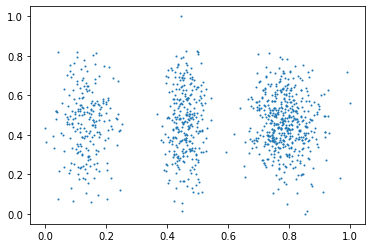

In [27]:
gaussian_data = generate_3_gaussian()

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
gaussian_data = min_max_scaler.fit_transform(gaussian_data)
print(gaussian_data)

plt.scatter(gaussian_data[:,0], gaussian_data[:,1],s=1)

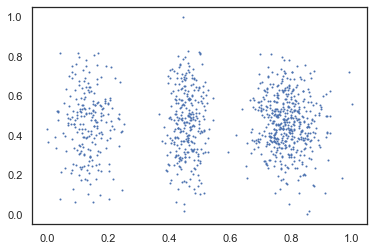

In [133]:
plt.scatter(gaussian_data[:,0], gaussian_data[:,1],s=1)

RUN Algorithms

Accuracy=20

In [134]:
meansplus, groups_meansplus = kmeansplus(gaussian_data, 10)
max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
print(max_alpha_meansplus, max_beta_meansplus)

2.17 1.6564643094112952


In [136]:
print(max_alpha_meansplus, max_beta_meansplus)

2.17 1.6564643094112952


In [ ]:
totaldist_meansplus = totaldist(gaussian_data, meansplus, True)

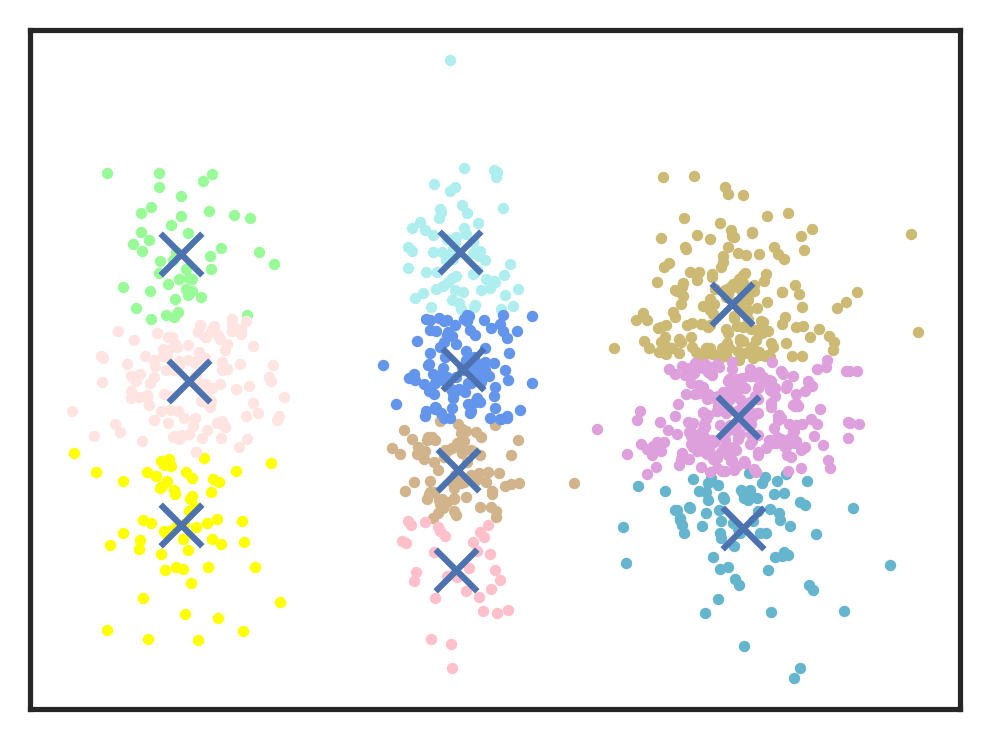

In [90]:
plt.figure(dpi=300,figsize=(4,3))
sns.set(style='white')
view_meansormedians(gaussian_data, meansplus, groups_meansplus)
#plt.title(r"$k$-means++")
plt.xticks([])  #去掉x轴
plt.yticks([])  #去掉y轴
#plt.margins(0,0)
plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/real dataset/gauss3_means2.png",dpi=300)

In [155]:
meansplus, groups_meansplus = kmeansplus(gaussian_data, 10)
max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
print(max_alpha_meansplus, max_beta_meansplus)

1.71 1.3408350130927822


In [29]:
medians, groups_medians = kmedians(gaussian_data, 10)
max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
print(max_alpha_medians, max_beta_medians)

1.99 1.5182666947258978


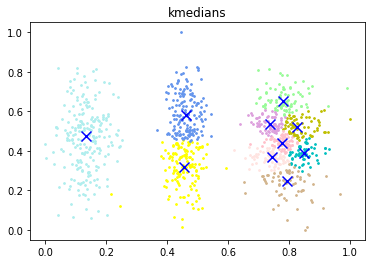

In [33]:
view_meansormedians(gaussian_data, medians, groups_medians)
plt.title("kmedians")
plt.show()

In [135]:
Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, 10, 20, 1/200)
max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
print(max_alpha_A3meansplus20, max_beta_A3meansplus20)

1.56 1.2739374870108064


In [ ]:
Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, 10, 20, 1/200)
max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
print(max_alpha_A3meansplus20, max_beta_A3meansplus20)

In [ ]:
plt.figure(dpi=300,figsize=(4,3))
sns.set(style='white')
ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
#plt.title(r"$ALG_3$++")
plt.xticks([])  #去掉x轴
plt.yticks([])  #去掉y轴
plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/real dataset/gauss3_alg.png",dpi=300)

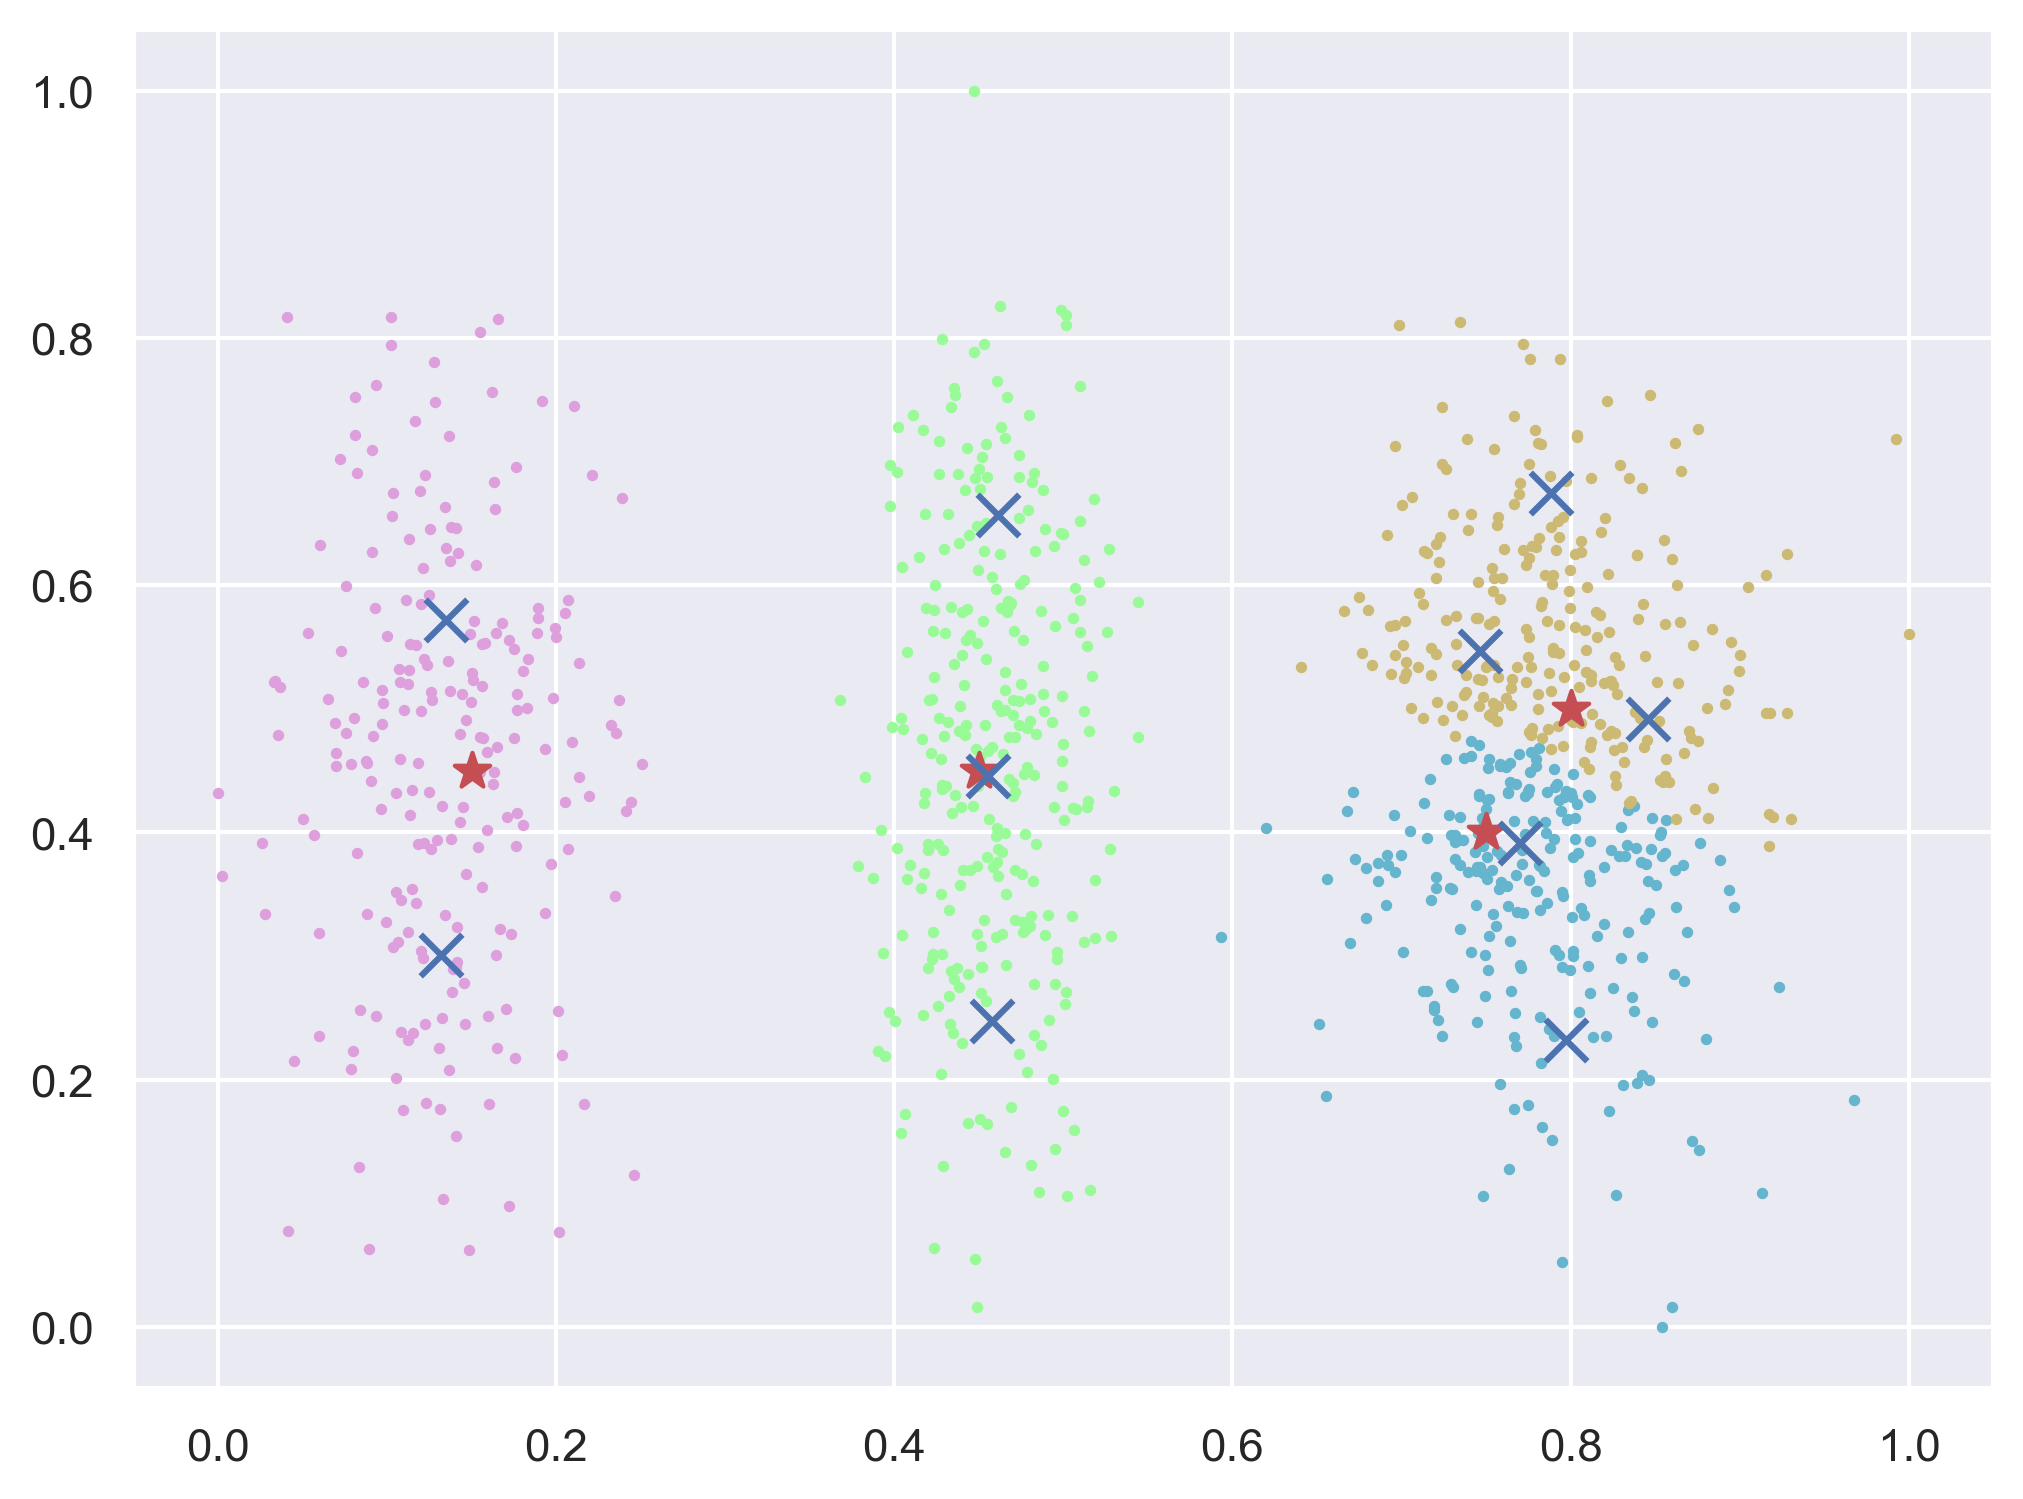

In [60]:
# plt.figure(dpi=300,figsize=(8,6))
# sns.set(style='darkgrid')
# ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
# #plt.title(r"$ALG_3$++")
# plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/real dataset/gauss3_alg_grid.png",dpi=300)

In [31]:
Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, 10, 20, 1/200)
max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
print(max_alpha_A3medians20, max_beta_A3medians20)

1.33 1.2144542098841997


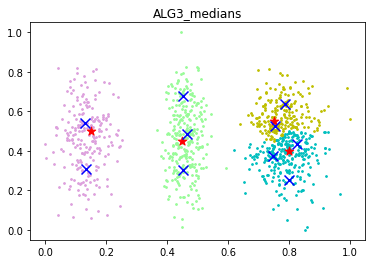

In [35]:
ALG3_augmented_nofix(Y_medians_20, revisedY_medians_20, cluster_pts_medians_20)
plt.title("ALG3_medians")
plt.show()

K=5~15

1.42 1.325430958588418 14.896839496809623
1.42 1.3266131452934433 14.897182919942606
2.628 1.9377704434657521 15.85618122177577
1.326 1.1658145593553746 13.415990152506108
1.582 1.3672613066273045 9.488109705686659
1.806 1.518081479207034 9.926675573121168
2.28 1.9630994683326837 8.453635914867727
1.584 1.278518480189486 9.050739079928057
1.971 1.5549307653140816 7.568501466959132
1.764 1.3610496049255825 7.567584545301823
1.72 1.3497534737848023 6.719752694532404
1.57 1.2762387579369139 6.753216645229672
1.881 1.4091233770252642 5.619992865003817


IndexError: list index out of range

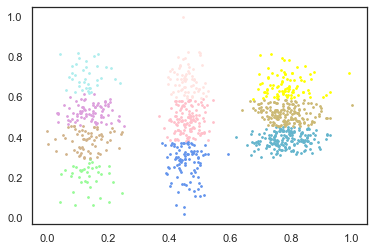

In [116]:
for K in range(5,16):
    meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
    max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
    max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
    totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
    print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
    view_meansormedians(gaussian_data, meansplus, groups_meansplus)
    plt.title("kmeansplus_g3 K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmeansplus_g3 K={}".format(K))
    plt.clf()# renew to prevent overlap
    

    Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
    max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
    max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
    totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
    print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
    ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
    plt.title("ALG3_meansplus_g3 K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_meansplus_g3 K={}".format(K))
    plt.clf()
    

In [121]:
for K in range(11,16):
    meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
    max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
    max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
    totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
    print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
    view_meansormedians(gaussian_data, meansplus, groups_meansplus)
    plt.title("kmeansplus_g3 K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmeansplus_g3 K={}".format(K))
    plt.clf()# renew to prevent overlap
    

    Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
    max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
    max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
    totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
    print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
    ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
    plt.title("ALG3_meansplus_g3 K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_meansplus_g3 K={}".format(K))
    plt.clf()
    

1.727 1.3940673091310039 5.553827948495313
1.551 1.4362771052284191 6.456588952691463
1.692 1.5964101321629653 5.939344039220756
1.716 1.4374301927180155 5.474487767708126
1.833 1.6953719272560013 5.5768374070722135
1.768 1.3320866346322526 4.818693157503183
1.68 1.5108117702675514 4.388678377094606
1.554 1.5498620748673213 4.655747791029386
2.115 1.6616685703990062 4.0984029088682385
1.65 1.390284178560969 4.370064943255584


<Figure size 432x288 with 0 Axes>

In [122]:
for K in range(5,16):
    meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
    max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
    max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
    totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
    print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
    view_meansormedians(gaussian_data, meansplus, groups_meansplus)
    plt.title("kmeansplus_g3_2 K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmeansplus_g3_2 K={}".format(K))
    plt.clf()# renew to prevent overlap
    

    Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
    max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
    max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
    totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
    print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
    ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
    plt.title("ALG3_meansplus_g3 K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_meansplus_g3_2 K={}".format(K))
    plt.clf()
    

1.42 1.325430958588418 14.896884089026862
1.42 1.3266131452934433 14.897182919942606
1.704 1.581436324274454 11.059968559209766
1.35 1.2172590809641806 13.35226578693695
1.365 1.098242204435239 12.480444602644177
1.813 1.524468280426456 9.929430659100072
1.752 1.4285564837143534 8.07928220768979
1.576 1.2744714262497907 9.050856809631554
1.539 1.26291582742824 7.178925505214915
1.728 1.3395035541660243 7.52069191173425
1.44 1.2478255123622748 6.714599457811713
1.56 1.2724721691057068 6.75320936762548
1.892 1.416673662814843 5.565110780282626
1.551 1.4362771052284191 6.5299288575420515
1.692 1.5964101321629653 6.138961216381373
1.476 1.227454264403264 5.426020456564834
2.067 1.5777305617537845 5.017268693561813
1.547 1.4237203893894586 4.81027449145863
1.666 1.5416530245844446 4.515123024153188
1.526 1.3202186852444446 4.627411359719192
2.43 1.6088188214853045 4.450057439913564
1.65 1.390284178560969 4.379506155941607


<Figure size 432x288 with 0 Axes>

In [123]:
for K in range(16,20):
    meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
    max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
    max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
    totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
    print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
    view_meansormedians(gaussian_data, meansplus, groups_meansplus)
    plt.title("kmeansplus_g3_2 K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmeansplus_g3_2 K={}".format(K))
    plt.clf()# renew to prevent overlap
    

    Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
    max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
    max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
    totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
    print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
    ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
    plt.title("ALG3_meansplus_g3 K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_meansplus_g3_2 K={}".format(K))
    plt.clf()
    

1.968 1.7143571623224931 4.195012900311029
1.792 1.5862990953624616 4.07274138256988
2.38 1.7991126011444176 3.7362747013078033
1.853 1.3942786838692576 4.099964734722121
1.71 1.6564811565154967 3.6269315500143375
1.458 1.364690097803246 3.422108608881148
1.862 1.3601102031738135 3.1382880910885027
1.596 1.4422960446957351 3.246179797412909


<Figure size 432x288 with 0 Axes>

In [125]:
K=10
meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
view_meansormedians(gaussian_data, meansplus, groups_meansplus)
plt.title("kmeansplus_g3_3 K={}".format(K))
plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmeansplus_g3_3 K={}".format(K))
plt.clf()# renew to prevent overlap


Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
plt.title("ALG3_meansplus_g3_3 K={}".format(K))
plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_meansplus_g3_3 K={}".format(K))
plt.clf()


1.71 1.3447343283551583 6.037246524784158
1.57 1.2762387579369139 6.810471789494343


<Figure size 432x288 with 0 Axes>

In [126]:
for i in range(10):
    K=10
    meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
    max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
    max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
    totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
    print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
    view_meansormedians(gaussian_data, meansplus, groups_meansplus)
    plt.title("kmeansplus_g3 K=10 i={}".format(i))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/kmeansplus_g3 K=10 i={}".format(i))
    plt.clf()# renew to prevent overlap
    

    Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
    max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
    max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
    totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
    print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
    ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
    plt.title("ALG3_meansplus_g3 K=10 i={}".format(i))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/ALG3_meansplus_g3 K=10 i={}".format(i))
    plt.clf()
    

1.45 1.2685923943863213 6.712152898692356
1.56 1.2739374870108064 6.753317025315833
1.58 1.9695767777912236 6.981035998096297
1.56 1.2724721691057068 6.75320936762548
1.59 1.9690247614407361 6.9754730978017525
1.56 1.2697173428381465 6.756661955516841
1.71 1.3447343283551583 5.982281005764078
1.57 1.279479471483177 6.807107733084904
1.57 1.3024012562515561 6.804457746107717
1.56 1.2697173428381465 6.75429399312407
1.71 1.3338401904542412 5.982831094663293
1.56 1.2724721691057068 6.752976019948373
1.82 1.767198171447452 6.3746427125763185
1.59 1.307786502130964 6.752785344395983
1.71 1.3447343283551583 6.677653361667153
1.57 1.279479471483177 6.807107733084904
2.17 1.6564643094112952 6.40673218125695
1.56 1.2697173428381465 6.75429399312407
2.21 1.7201883107219913 6.516281098069011
1.57 1.2762387579369139 6.810471789494343


<Figure size 432x288 with 0 Axes>

In [127]:
for K in range(8,18):
    meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
    max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
    max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
    totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
    print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
    view_meansormedians(gaussian_data, meansplus, groups_meansplus)
    plt.title("kmeansplus_g3_4 K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_times4/kmeansplus_g3_4 K={}".format(K))
    plt.clf()# renew to prevent overlap
    

    Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
    max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
    max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
    totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
    print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
    ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
    plt.title("ALG3_meansplus_g3_4 K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_times4/ALG3_meansplus_g3_4 K={}".format(K))
    plt.clf()
    

1.56 1.2895229083989308 12.01395038120383
1.8 1.4823050286789174 8.800432195931835
1.53 1.2610387616670256 7.233324336638504
2.052 1.591802868600804 7.783699220547826
2.19 1.6830377175243654 6.363302394951262
1.56 1.2724721691057068 6.75320936762548
1.881 1.4131286785551185 5.5575726081515
1.551 1.4362771052284191 6.455368513273985
1.884 1.4813174788209278 5.126004715308542
1.62 1.378714210014092 5.411887147993044
1.703 1.5076166394345805 4.8539591970821965
1.703 1.571383797625851 4.799846440879088
1.974 1.577622967792491 4.243964021524874
1.526 1.304284712162473 4.6195734364043535
2.085 1.6158273415079947 4.565449567916634
1.665 1.3893208704568354 4.458501750230584
1.44 1.2359330778688036 3.763661693861382
1.776 1.614627460615999 4.0946027164572625
2.176 1.6211649705005338 3.6883355931659163
1.853 1.4632525141527608 4.099753551001531


<Figure size 432x288 with 0 Axes>

K in range(8,18)

In [129]:
for K in range(8,18):
    meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
    max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
    max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
    totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
    print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
    view_meansormedians(gaussian_data, meansplus, groups_meansplus)
    plt.title("kmeansplus_g3_5 K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_times5/kmeansplus_g3_5 K={}".format(K))
    plt.clf()# renew to prevent overlap
    

    Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
    max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
    max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
    totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
    print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
    ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
    plt.title("ALG3_meansplus_g3_5 K={}".format(K))
    plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_times5/ALG3_meansplus_g3_5 K={}".format(K))
    plt.clf()
    

1.368 1.350982510100011 8.644006801077095
1.576 1.2744714262497907 9.050856809631554
1.953 1.5500175016962805 7.560927661884417
1.728 1.3395035541660243 7.52069191173425
2.26 1.7368179700605118 6.317838160827819
1.57 1.279479471483177 6.752453898890108
2.42 1.8647223718349564 5.968053113862536
1.551 1.4362771052284191 6.535205217674206
1.368 1.2252405419967731 5.276482924965994
1.644 1.4076656777870027 5.403328726141844
1.82 1.503910291216022 4.58316262074858
1.846 1.420105685364844 4.813512961336292
1.946 1.571207372404517 4.546745774265264
1.666 1.3922382183543252 4.686444496422742
1.98 1.5967963934254377 4.176748868231178
1.635 1.3893208704568354 4.412951521208871
1.632 1.4222384017042542 3.8656303971669175
1.728 1.4444733042291096 4.131897080705269
2.074 1.871766377780865 3.629700812441327
1.853 1.4297653543498177 4.097376293131962


<Figure size 432x288 with 0 Axes>

In [130]:
for i in range(10):
    for K in range(8,18):
        meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
        max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
        max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
        totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
        print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
#         view_meansormedians(gaussian_data, meansplus, groups_meansplus)
#         plt.title("kmeansplus_g3_4 K={}".format(K))
#         plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_times4/kmeansplus_g3_4 K={}".format(K))
#         plt.clf()# renew to prevent overlap


        Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
        max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
        max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
        totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
        print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
#         ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
#         plt.title("ALG3_meansplus_g3_4 K={}".format(K))
#         plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_times4/ALG3_meansplus_g3_4 K={}".format(K))
#         plt.clf()
    

1.368 1.350915487424037 8.643456712177874
1.576 1.2744714262497907 9.050856809631554
1.971 1.5553566052101266 6.882128175619806
1.728 1.3395035541660243 7.5244009124376285
1.71 1.974795399616714 7.030073040123027
1.56 1.2697173428381465 6.75429399312407
2.343 1.8450733400501795 5.958911756682043
1.551 1.4362771052284191 6.512201267891175
1.476 1.4043001147757213 5.2108509606974
1.584 1.3721995942739338 5.510293786096929
2.041 1.5664283058091057 4.6331618250674
1.885 1.5123823646214891 5.050311381268689
1.848 1.5188007777324632 4.373726142889836
1.68 1.3616248810802443 4.711565485536069
2.385 1.740368780222262 4.179665458743303
1.65 1.4279818183286963 4.4239703294846695
1.984 1.6812759030605964 3.865201805736737
1.728 1.4444733042291096 4.112188183552798
2.312 1.7317539746512243 3.6204314953141217
1.819 1.4297653543498177 4.104024500725473
1.368 1.3430570675225266 8.646425728513778
1.576 1.2744714262497907 9.050856809631554
1.539 1.26291582742824 7.233891024234999
1.746 1.35062641129162

In [131]:
for i in range(10):
    for K in range(18,21):
        meansplus, groups_meansplus = kmeansplus(gaussian_data, K)
        max_alpha_meansplus, max_alpha_coalition_meansplus, max_alpha_deviating_center_meansplus = fairness_score_alpha(gaussian_data, meansplus, 20)
        max_beta_meansplus, max_beta_coalition_meansplus, max_beta_deviating_center_meansplus = fairness_score_beta(gaussian_data, meansplus, 20)
        totaldist_meansplus = totaldist(gaussian_data, meansplus, True)
        print(max_alpha_meansplus, max_beta_meansplus, totaldist_meansplus)
#         view_meansormedians(gaussian_data, meansplus, groups_meansplus)
#         plt.title("kmeansplus_g3_4 K={}".format(K))
#         plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_times4/kmeansplus_g3_4 K={}".format(K))
#         plt.clf()# renew to prevent overlap


        Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20 = ALG3_meansplus(gaussian_data, K, 20, 1/200)
        max_alpha_A3meansplus20, max_alpha_coalition_A3meansplus20, max_alpha_deviating_center_A3meansplus20 = fairness_score_alpha(gaussian_data, revisedY_meansplus_20, 20)
        max_beta_A3meansplus20, max_beta_coalition_A3meansplus20, max_beta_deviating_center_A3meansplus20 = fairness_score_beta(gaussian_data, revisedY_meansplus_20, 20)
        totaldist_A3meansplus20 = totaldist(gaussian_data, revisedY_meansplus_20, True)
        print(max_alpha_A3meansplus20, max_beta_A3meansplus20, totaldist_A3meansplus20)
#         ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
#         plt.title("ALG3_meansplus_g3_4 K={}".format(K))
#         plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_times4/ALG3_meansplus_g3_4 K={}".format(K))
#         plt.clf()
    

2.052 1.8771658800550615 3.8992904718437993
1.53 1.416269676471984 3.4379036528891063
1.862 1.4447796495906184 3.2445880889443433
1.615 1.4611920583793614 3.2558474077356903
1.88 1.483972783832339 3.053435149655362
1.66 1.5208713407629093 3.580270031866388
1.71 1.6564811565154967 3.559335330460111
1.476 1.416269676471984 3.54082151658435
2.299 1.817224296611268 3.266130484955917
1.577 1.4555746773204978 3.2537238275196847
2.18 1.7643972221774336 3.104967466872147
1.82 1.7260579833867764 3.3275478441036763
2.844 1.7737557247668294 3.826939344640368
1.494 1.3677434784960296 3.429890325441384
2.508 1.833593307275049 3.416824531157451
1.577 1.4147788462263913 3.2455483000843603
2.24 1.8564373765307112 3.13448397366842
1.88 1.6931942031268377 3.6082570842039257
2.826 1.9185138511136495 3.7886476518031302
1.494 1.399283713314306 3.4312665352237337
2.356 1.65696930232939 3.310528564842663
1.482 1.4016738028564786 3.2479680403490034
1.78 1.4274699992400843 3.011487977876477
1.76 1.647444521683

Median Part

[[0.48665772 0.5795677 ]
 [0.20119519 0.25511925]
 [0.7345849  0.32205199]
 ...
 [0.16790008 0.56946545]
 [0.70950502 0.53408006]
 [0.74937967 0.30060506]]


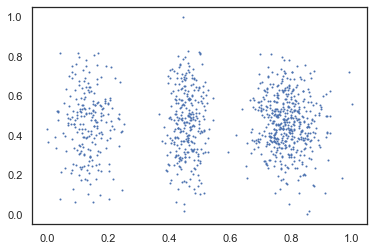

In [157]:
print(gaussian_data)

plt.scatter(gaussian_data[:,0], gaussian_data[:,1],s=1)

1.788 1.9738382901062663 82.54121169706924


Text(0.5, 1.0, 'kmedians K=12')

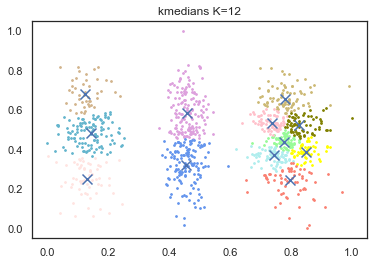

In [175]:
K=12
medians, groups_medians = kmedians(gaussian_data, K)
max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
totaldist_medians = totaldist(gaussian_data, medians, False)
print(max_alpha_medians, max_beta_medians, totaldist_medians)
view_meansormedians(gaussian_data, medians, groups_medians)
plt.title("kmedians K={}".format(K))
        

1.32 1.2498328975683877 77.85868792962384


Text(0.5, 1.0, 'ALG3_medians K=12')

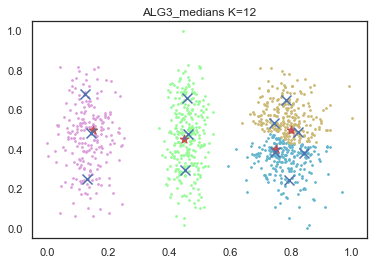

In [176]:
K=12
Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, K, 20, 1/200)
max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)
ALG3_augmented_nofix(Y_medians_20, revisedY_medians_20, cluster_pts_medians_20)
plt.title("ALG3_medians K={}".format(K))

In [164]:
for i in range(10):
    for K in range(8,18):
        medians, groups_medians = kmedians(gaussian_data, K)
        max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
        max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
        totaldist_medians = totaldist(gaussian_data, medians, False)
        print(max_alpha_medians, max_beta_medians, totaldist_medians)
#         view_meansormedians(gaussian_data, meansplus, groups_meansplus)
#         plt.title("kmeansplus_g3_4 K={}".format(K))
#         plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_times4/kmeansplus_g3_4 K={}".format(K))
#         plt.clf()# renew to prevent overlap


        Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, K, 20, 1/200)
        max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
        max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
        totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
        print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)
#         ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
#         plt.title("ALG3_meansplus_g3_4 K={}".format(K))
#         plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_times4/ALG3_meansplus_g3_4 K={}".format(K))
#         plt.clf()
    

1.408 1.2260404181502738 98.98576954208319
1.28 1.1810149336018017 97.99480570760514
1.719 1.2129972835826344 97.33999559602364
1.458 1.204952067194854 90.41192268352471
1.77 1.4873570944620198 86.13604258841941
1.35 1.203978887253173 86.16565966484411
1.507 1.1689135464272826 83.73772541604323
1.419 1.2493613234313394 84.96919959490897
3.192 2.6212714365457517 96.64195763949176
1.32 1.2498328975683877 77.85868792962384
1.937 2.1050748771037107 80.58153603331888
1.612 1.3733699298398239 77.81334640113091
2.044 1.7082936909164164 76.20923668730069
1.456 1.2962383207929171 72.91509857951243
2.025 1.521798190368058 71.22062018095536
1.56 1.2421353770547052 72.23344048436708
1.904 1.6232638552032657 68.28336178534956
1.664 1.2832681720658854 68.83196362463839
3.111 2.5098019072222293 80.5964825611168
1.292 1.1589236789825403 66.17595282621956
1.224 1.174520382542747 97.58419721324823
1.28 1.1809872538478208 98.00934545551227
1.377 1.340529033671378 92.02667177633262
1.458 1.204952067194854

KeyboardInterrupt: 

In [170]:
for i in range(10):
    for K in range(8,18):
        medians, groups_medians = kmedians(gaussian_data, K)
        max_alpha_medians, max_alpha_coalition_medians, max_alpha_deviating_center_medians = fairness_score_alpha_M(gaussian_data, medians, 20)
        max_beta_medians, max_beta_coalition_medians, max_beta_deviating_center_medians = fairness_score_beta_M(gaussian_data, medians, 20)
        totaldist_medians = totaldist(gaussian_data, medians, False)
        print(max_alpha_medians, max_beta_medians, totaldist_medians)
#         view_meansormedians(gaussian_data, meansplus, groups_meansplus)
#         plt.title("kmeansplus_g3_4 K={}".format(K))
#         plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_times4/kmeansplus_g3_4 K={}".format(K))
#         plt.clf()# renew to prevent overlap


        Y_medians_20, revisedY_medians_20, cluster_pts_medians_20 = ALG3_medians(gaussian_data, K, 20, 1/200)
        max_alpha_A3medians20, max_alpha_coalition_A3medians20, max_alpha_deviating_center_A3medians20 = fairness_score_alpha_M(gaussian_data, revisedY_medians_20, 20)
        max_beta_A3medians20, max_beta_coalition_A3medians20, max_beta_deviating_center_A3medians20 = fairness_score_beta_M(gaussian_data, revisedY_medians_20, 20)
        totaldist_A3medians20 = totaldist(gaussian_data, revisedY_medians_20, False)
        print(max_alpha_A3medians20, max_beta_A3medians20, totaldist_A3medians20)
#         ALG3_augmented_nofix(Y_meansplus_20, revisedY_meansplus_20, cluster_pts_meansplus_20)
#         plt.title("ALG3_meansplus_g3_4 K={}".format(K))
#         plt.savefig("/Users/lijunli/Desktop/ex/Fair clustering/experiment/gaussian3/g3_times4/ALG3_meansplus_g3_4 K={}".format(K))
#         plt.clf()
    

1.536 1.1785562559507472 102.87114493003907
1.28 1.1735101546627627 97.99892063611294
2.295 1.7704214296033762 95.66699505064064
1.413 1.3527990721296872 92.2141360235528
2.01 1.4151317279735018 87.95638755813101
1.33 1.2144542098841997 86.16510751728815
2.189 1.8618631845580809 98.67965021476968
1.43 1.1749043505333303 84.50723749401436
2.16 1.6529057963337084 82.50163494469379
1.416 1.2681979947430333 79.13089001538872
1.703 1.3677509808706207 78.31698361828725
1.417 1.3376051063927774 75.47628876809667
2.086 2.208169607390153 78.30632171238241
1.456 1.1768220596058159 73.30004641005208
1.56 1.2421353770547052 70.2401286533236
1.38 1.237439351970316 72.03139152448145
2.048 1.5512404872870673 68.86870701565407
1.696 1.2622442717512885 68.72888334061412
2.193 1.6977595191898096 69.80967607468097
1.751 1.3031259243206776 66.43453848828989
1.472 1.2988189933561776 98.35501065170511
1.264 1.1710767379105695 99.96212170301527
1.764 1.2501809116733495 99.04737893133226
1.458 1.2049520671948

KeyboardInterrupt: 